<a href="https://colab.research.google.com/github/HarrisonWBlack/Machine-Learning-CAP-5610/blob/master/Assignment%201/Problem1_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 1: Use logistic regression with mean squared error loss.**

Load in the training and test images

In [0]:
# Problem 1
# Use logistic regression with mean squared error loss

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

# Load data set. 60000 training images, 10000 testing images
mnist = tf.keras.datasets.mnist
(training_imgs, training_labels), (test_imgs_og, test_labels) = mnist.load_data()

number_of_imgs, num_rows, num_columns = training_imgs.shape

# Reshape data set to vectors
training_imgs = (training_imgs.reshape(number_of_imgs, num_rows * num_columns, 1)).astype('float32') / 255
test_imgs = (test_imgs_og.reshape(len(test_imgs_og), num_rows * num_columns)).astype('float32') / 255

# Seed random number
np.random.seed()

Function and class definitions

In [0]:
# Sigma Function
def sig_func(z):
  s = 1.0 / (1.0 + np.exp(-z))
  return s

# Calculate Sigma Prime
def sig_prime(z):
  sig_prime = sig_func(z) * (1 - sig_func(z))
  return sig_prime

# Calculate Squared Error Loss
def squared_error(a, y):
  return 0.5 * (a - y) ** 2

# Image Classifier class
class ImageClassifier:
  def __init__(self, number):
    self.number = number
    self.weight = np.random.randn(num_rows * num_columns, 1)
    self.bias = 0
    self.loss = 0
  
  def model_training(self):
    
    learning_rate = 0.024

    for i in range(number_of_imgs):
      x = training_imgs[i]
      y = 0
      
      if training_labels[i] == self.number:
        y = 1

      z = self.weight.T.dot(x) + self.bias
      a = sig_func(z)
      self.loss = squared_error(a, y)
      prime_a = sig_prime(a)
      
      self.weight -= learning_rate * (a - y) * prime_a * x
      self.bias -= (a - y) * prime_a * learning_rate
      
  def prediction(self, x):
    prediction = sig_func(self.weight.T.dot(x) + self.bias)
    return prediction


Create and traing each classifier, 0-9.

In [0]:
# Create and train each classifier
models = []
for digit in range(10):
  models.append(ImageClassifier(digit))
  models[digit].model_training()

Test the model on the training imgs to determine it's accuracy. Show an example prediction.

Example prediction: 


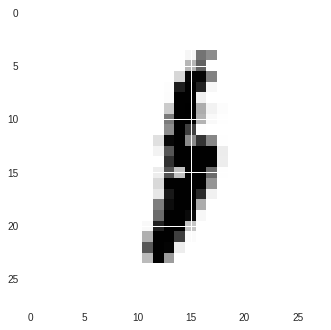

Actual number:  1
Predicted number:  1

Model  0  loss value:  [[0.0117097]]
Model  1  loss value:  [[2.69247358e-15]]
Model  2  loss value:  [[2.20704494e-10]]
Model  3  loss value:  [[4.32786107e-12]]
Model  4  loss value:  [[4.28963144e-18]]
Model  5  loss value:  [[5.72450575e-05]]
Model  6  loss value:  [[1.83662924e-14]]
Model  7  loss value:  [[3.86130462e-07]]
Model  8  loss value:  [[0.00040079]]
Model  9  loss value:  [[0.00295697]]

Overall accuracy across all models:  87.26 %


In [46]:
# Test accuracy on test images
predictions = []
answer = 0
num_right = 0

for i in range ( len(test_imgs) ):
  for j in range(len(models)):
     predictions.append(models[j].prediction(test_imgs[i]))
      
  answer = np.argmax(predictions)
  predictions.clear()
  
  if(answer == test_labels[i]):
    num_right += 1    

# Example predictions
print("Example prediction: ")
test_index = np.random.randint(0, len(test_imgs), size=None)
example_predictions = []

for k in range(len(models)):
  example_predictions.append(models[k].prediction(test_imgs[test_index]))
      
example_answer = np.argmax(example_predictions)

plt.imshow(test_imgs_og[test_index])
plt.show()

print("Actual number: ", test_labels[test_index])
print("Predicted number: ", example_answer)

print()
for i in range(10):
  print("Model ", i, " loss value: ", models[i].loss )

print("\nOverall accuracy across all models: ", round(num_right/len(test_imgs) * 100, 2), "%")
